<a href="https://colab.research.google.com/github/shakib68/NYC-taxi-capstone/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

**Importing  libraries**

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading data**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone project 2/Copy of NYC Taxi Data.csv")


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


**Checking Datatype in our Dataset**

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


**Checking missing value**

In [8]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


**Here you can see there is no missing value in our dataset, So will proceed for solution and analysis**

**Importing geopy library to calculate distance**


In [9]:
from geopy.distance import great_circle

**Calculte distance betwee pickup and dropoff points**

In [10]:
#Calculte distance betwee pickup and dropoff points
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [11]:
# Calculating distance for each trip
df['distance'] = df.apply(lambda df: distance_cal(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'] ), axis=1)


**Calculate Speed in km/h for further insights**

In [12]:

df['speed'] = (df.distance/(df.trip_duration/3600))

In [13]:
df['distance']

0          1.498523
1          1.805510
2          6.385108
3          1.485501
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: distance, Length: 1458644, dtype: float64

**converting it to datetime**

In [14]:
#convert it to datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [15]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

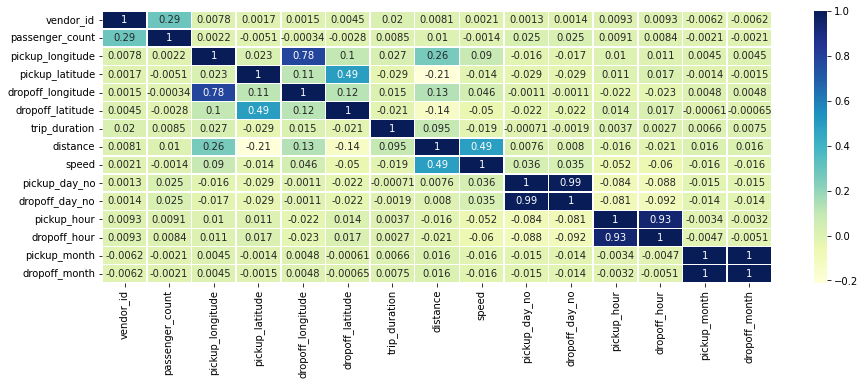

In [16]:
# correlation graph of the data
fig, ax = plt.subplots(figsize=(15,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

  
# displaying heatmap
plt.show()

**Here we can see that the is strongly correlated but the column is important for analysis. further to remove multi collinearity we remove the pickup_month and pickup_day column as pickup_month and dropoff_month has exact same value**

In [17]:
df.drop(['pickup_month'],inplace=True ,axis=1)
df.drop(['pickup_day_no'], inplace=True,axis=1)

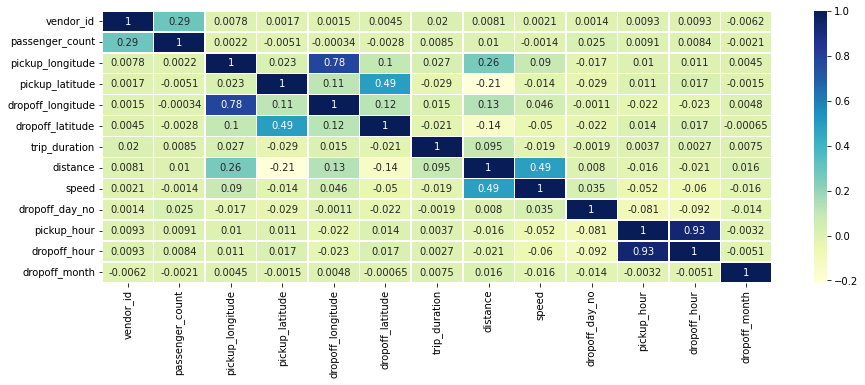

In [18]:
# correlation graph of the data
fig, ax = plt.subplots(figsize=(15,5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

  
# displaying heatmap
plt.show()

**Now the data is looking good**

**Checking for outlier in column trip duration**

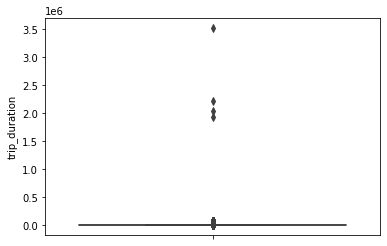

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


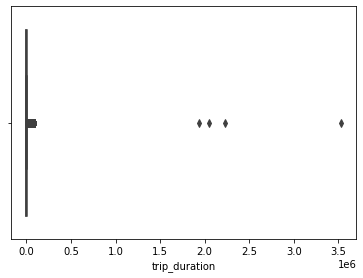

In [19]:
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y=df['trip_duration'])
plt.show()
columns=['trip_duration']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

**You can see that there are some outliers in dataset so we will try to fin 0-100 percentile value  to find a the correct percentile value for removal of outliers**

In [20]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])


0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


**We can see that the value of outlier is in the range from 90 to 100 percentile but we do not  know exactly so we do some more step from 90-100**

In [21]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [22]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in np.linspace(99.0,100.0,10 ,endpoint=False):
    var =df["trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])


99.0 percentile value is 3440
99.1 percentile value is 3540
99.2 percentile value is 3652
99.3 percentile value is 3782
99.4 percentile value is 3942
99.5 percentile value is 4139
99.6 percentile value is 4403
99.7 percentile value is 4765
99.8 percentile value is 5552
99.9 percentile value is 85129
100 percentile value is  3526282


**From here we can set the value for trip duration less than 12000 ,otherwise all the values>6000 will be treated as outlier**

In [23]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()

trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

In [24]:
df = df[df.trip_duration <= 12000]

In [25]:
df.shape

(1456548, 19)

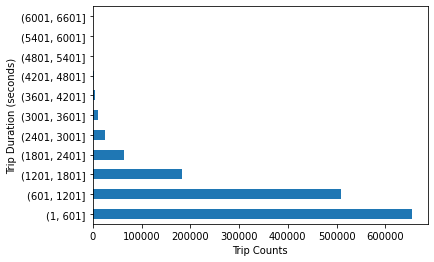

In [26]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()


**Oulier in distance column**

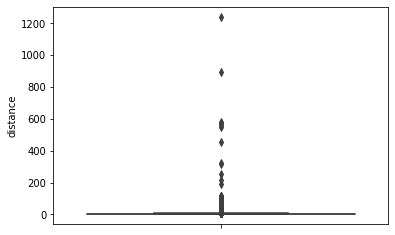

In [27]:

sns.boxplot(y=df['distance'])
plt.show()

**we can see that there are some outlier**

In [28]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.7924539550518328
20 percentile value is 1.0894949852190166
30 percentile value is 1.3797536152657544
40 percentile value is 1.7060703489712603
50 percentile value is 2.0932970548861065
60 percentile value is 2.596797207139481
70 percentile value is 3.3360686220217035
80 percentile value is 4.618163635490711
90 percentile value is 7.6272114676000164
100 percentile value is  1240.9104296218293


**Will try to find 90-100 percentile value to get clear value**

In [29]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100):
    var =df["distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 7.6272114676000164
91 percentile value is 8.252112427098078
92 percentile value is 8.883978724394714
93 percentile value is 9.45406492509464
94 percentile value is 10.077277933256783
95 percentile value is 11.012375484086158
96 percentile value is 12.806856271342918
97 percentile value is 15.401938594024843
98 percentile value is 19.36074262787274
99 percentile value is 20.784956727224383
100 percentile value is  1240.9104296218293


**have to see the percentile from 99-100 to get more clear picture**

In [30]:
#calculating 99-100th percentile to find a the correct percentile value for removal of outliers
for i in np.linspace(99.0,100.0,10 ,endpoint=False):
    var =df["distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

99.0 percentile value is 20.784956727224383
99.1 percentile value is 20.919408786151145
99.2 percentile value is 21.049461190383436
99.3 percentile value is 21.185353212888952
99.4 percentile value is 21.364469465784133
99.5 percentile value is 21.555565451698538
99.6 percentile value is 21.829313663540656
99.7 percentile value is 22.261268858815328
99.8 percentile value is 22.88839090760811
99.9 percentile value is 24.742444400517236
100 percentile value is  1240.9104296218293


In [31]:
df['distance'].value_counts()


0.000000    5894
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
0.563330       1
5.925436       1
1.215103       1
1.795031       1
1.134044       1
Name: distance, Length: 1450269, dtype: int64

**We can take value as 25 becouse 99.9 percentile value are less than it**

In [32]:
df=df[df['distance']<25]

**We will only keep those observation whose distance is greater than 0**

In [33]:
df=df[df['distance']!=0]


In [34]:
df['distance'].value_counts()


0.000424    45
0.000424    43
0.000424    35
0.000424    22
0.000424    21
            ..
8.860892     1
1.498127     1
2.917715     1
4.698058     1
1.134044     1
Name: distance, Length: 1448878, dtype: int64

In [35]:
df.shape

(1449264, 19)

In [36]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
distance                     float64
speed                        float64
pickup_day                    object
dropoff_day                   object
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
dropoff_month                  int64
dtype: object

**Passenger Analysis**

In [37]:
df.passenger_count.value_counts()


1    1027102
2     208977
5      77529
3      59516
6      47904
4      28182
0         51
7          2
8          1
Name: passenger_count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


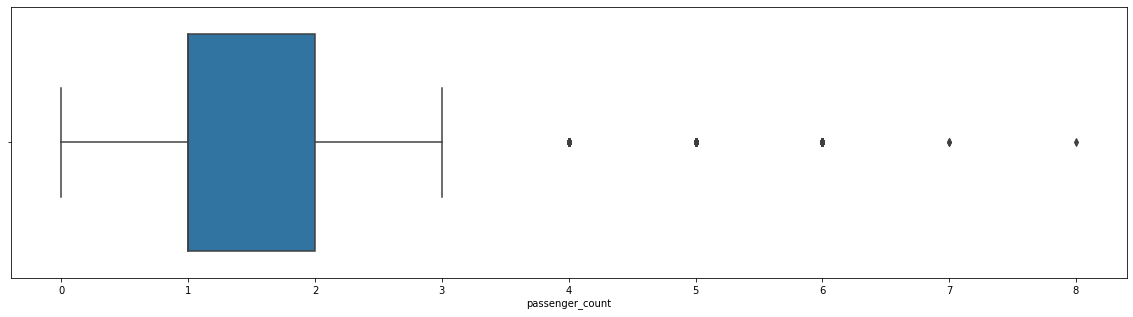

In [38]:
plt.figure(figsize = (20,5))
sns.boxplot(df.passenger_count)
plt.show()

**we can see that there are some outlier**

There are some trips with 0 passenger count.

Few trips consisted of even 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency

Most of trip consist of passenger either 1 or 2

So we would replace the 0 passenger count with 1.

In [39]:
df['passenger_count'] = df.passenger_count.map(lambda x: 1 if x == 0 else x)


**Also, we will remove the records with passenger count > 7, 8 or 9 as they are extreme values and looks very odd to be ocupied in a taxi.**

In [40]:
df = df[df.passenger_count <= 6]

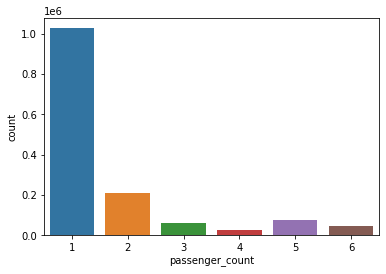

In [41]:
sns.countplot(x='passenger_count',data=df)





**Outlier in speed column**

In [42]:
df.speed.describe()

count    1.449261e+06
mean     1.445507e+01
std      1.142027e+01
min      1.190385e-03
25%      9.178708e+00
50%      1.282703e+01
75%      1.786455e+01
max      9.274850e+03
Name: speed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


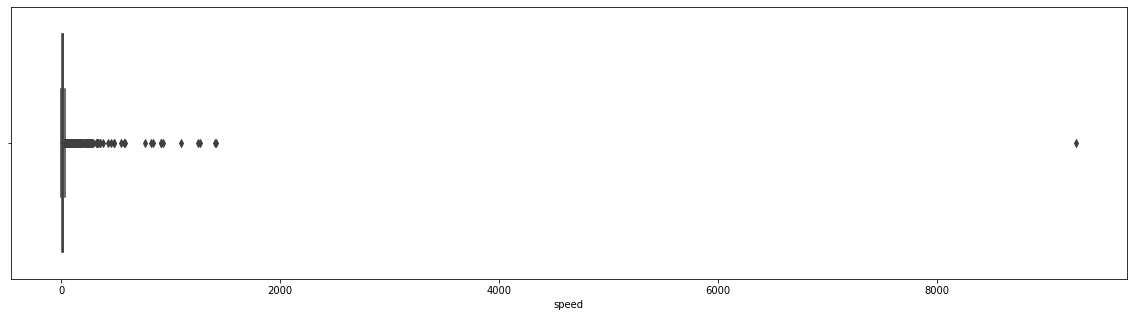

In [43]:
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()


Many trips were done at a speed of over 200 km/h.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


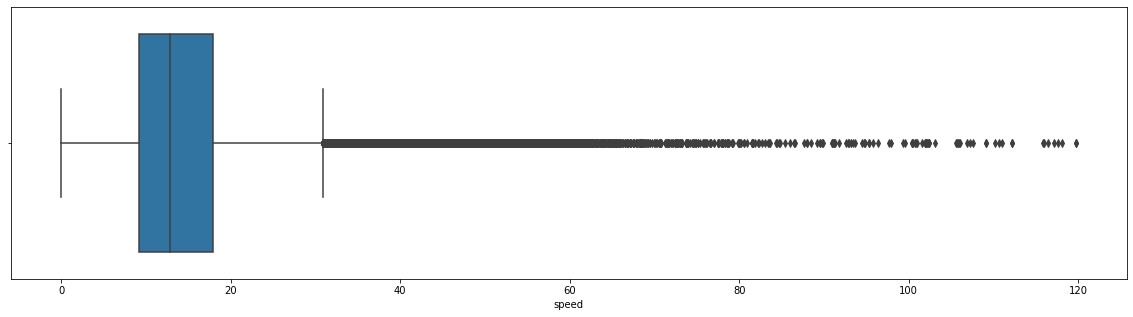

In [44]:
df = df[df.speed <= 120]
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

**Daily dropoff analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


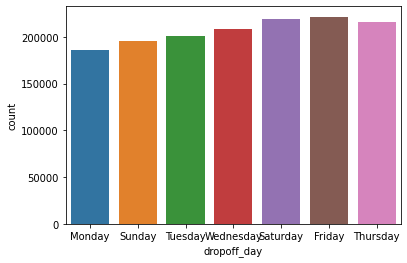

In [45]:
sns.countplot(df['dropoff_day'])


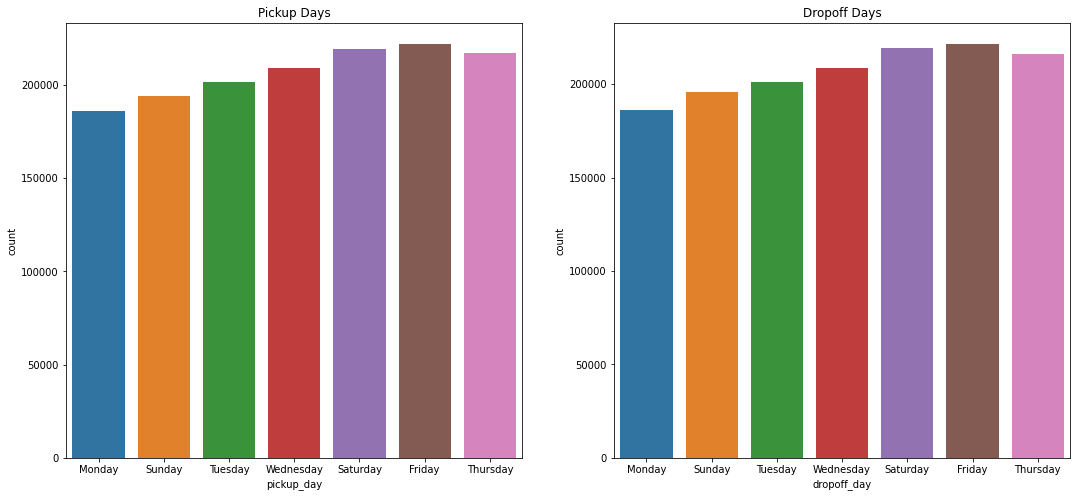

In [46]:
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].set_title('Pickup Days')


sns.countplot(x=df['pickup_day'],ax=axs[0])

axs[1].set_title('Dropoff Days')
sns.countplot(x=df['dropoff_day'],ax=axs[1])

**hourly Analysis**

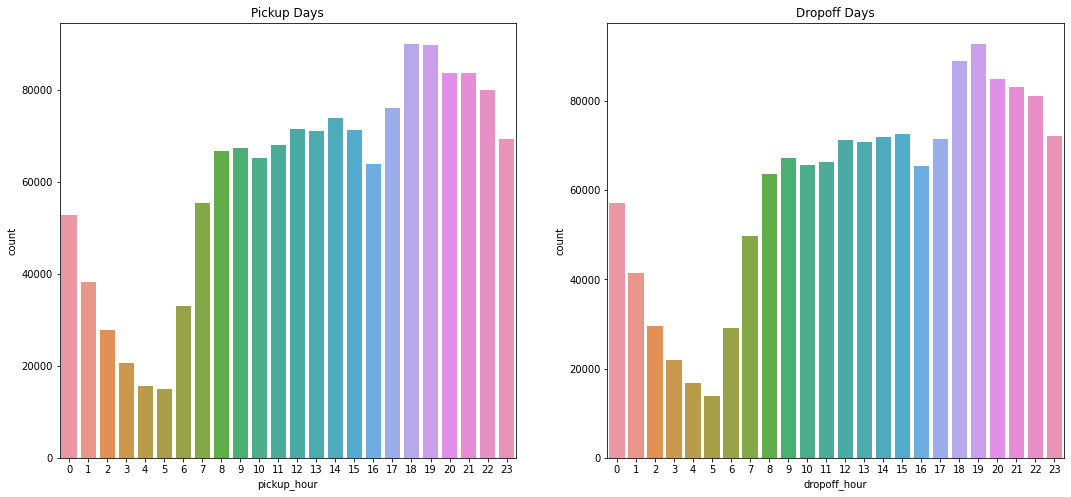

In [47]:
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].set_title('Pickup Days')


sns.countplot(x=df['pickup_hour'],ax=axs[0])

axs[1].set_title('Dropoff Days')
sns.countplot(x=df['dropoff_hour'],ax=axs[1])

**Monthly Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


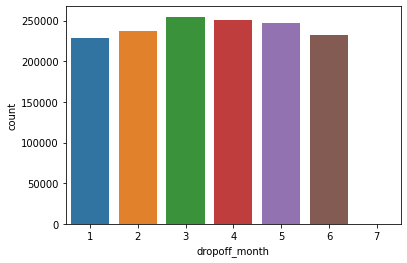

In [48]:
sns.countplot(df['dropoff_month'])


**Setting a time cycle of a day **

In [49]:
def day_time(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [50]:
df['picktime']=df['pickup_hour'].apply(day_time)
df['droptime']=df['dropoff_hour'].apply(day_time)

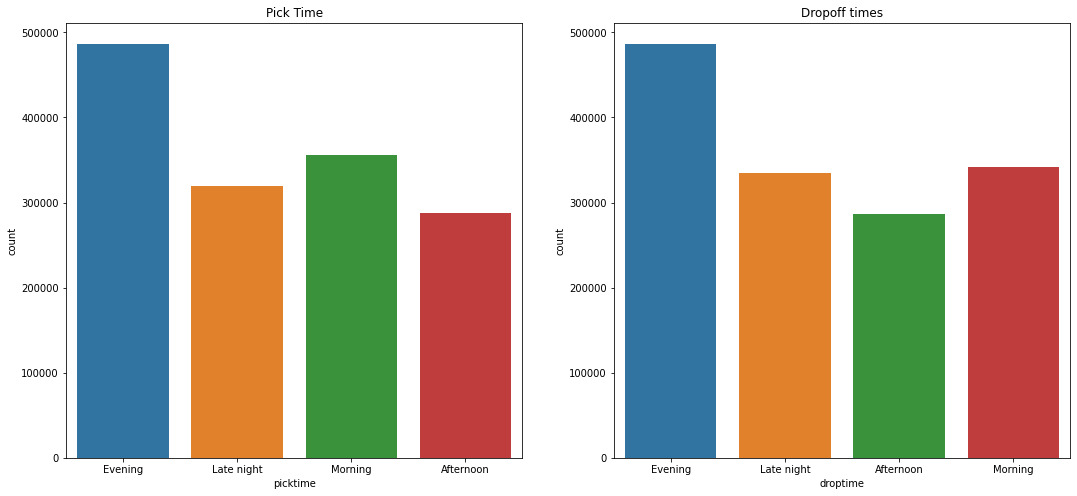

In [51]:
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].set_title('Pick Time')


sns.countplot(x=df['picktime'],ax=axs[0])

axs[1].set_title('Dropoff times')
sns.countplot(x=df['droptime'],ax=axs[1])

**Based on vendor id**

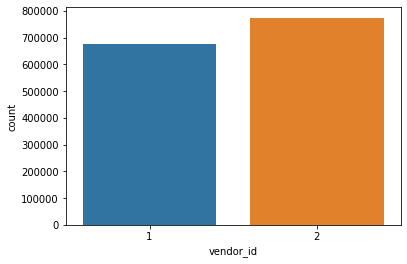

In [52]:
sns.countplot(x='vendor_id',data=df)


In [72]:
df.dtypes

id                               object
vendor_id                         int64
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag               object
trip_duration                     int64
distance                        float64
speed                           float64
pickup_day                       object
dropoff_day                      object
dropoff_day_no                    int64
pickup_hour                       int64
dropoff_hour                      int64
dropoff_month                     int64
picktime                         object
droptime                         object
flag_y                            int64
month_2                           uint8
month_3                           uint8
month_4                           uint8


**Independent Variables**

id — a unique identifier for each trip

vendor_id — a code indicating the provider associated with the trip record

pickup_datetime — date and time when the meter was engaged

dropoff_datetime — date and time when the meter was disengaged

passenger_count — the number of passengers in the vehicle (driver entered value)

pickup_longitude — the longitude where the meter was engaged

pickup_latitude — the latitude where the meter was engaged

dropoff_longitude — the longitude where the meter was disengaged

dropoff_latitude — the latitude where the meter was disengaged
distance:distance covered
speed ; speed calculated


store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
 



**Dependent Variable**= trip_duration

**We have id, pickup_day, dropoff_day, and store_and_fwd_flag  object type.**


**Done with data treatment and analysis ,will proceed to split the data in train and testthen will apply supervised ML model**

**We will create some dummy variable for categorical variable**

In [54]:
df['flag_y'] = np.where(df['store_and_fwd_flag']=='Y', 1, 0)

In [55]:
dummy = pd.get_dummies(df.dropoff_month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)


In [56]:
dummy = pd.get_dummies(df.pickup_day, prefix='day')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)


In [57]:
dummy = pd.get_dummies(df.picktime, prefix='pickuptime')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)


In [58]:
dummy = pd.get_dummies(df.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)


In [59]:
dummy = pd.get_dummies(df.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

In [74]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,day_Wednesday,pickuptime_Evening,pickuptime_Late night,pickuptime_Morning,vendor_id_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,1,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,0,1,1,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1,1,0,0,1,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,0,0,0,1,0,0,0,0,0


In [61]:
df.store_and_fwd_flag.value_counts(normalize=True)

N    0.994506
Y    0.005494
Name: store_and_fwd_flag, dtype: float64

Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:

Outstation trips didn't had proper connection at the time when trip completes
.
Temporary loss of signals while the trip was about to finish

Inconsistent signal reception over the trip duration.
The GPS or mobile device battery was down when the trip finished.

In [62]:
df.store_and_fwd_flag.value_counts()

N    1441180
Y       7962
Name: store_and_fwd_flag, dtype: int64

In [63]:
df.vendor_id[df.flag_y == 1].value_counts()

1    7962
Name: vendor_id, dtype: int64

Above result shows that all the offline trips were taken by vendor 1. We already know that vendor 2 has greater market share as compared to vendor 1. So, there can be two reasons for this scenario.

**Let's visualize the relationship between Distance covered and respective trip duration.**

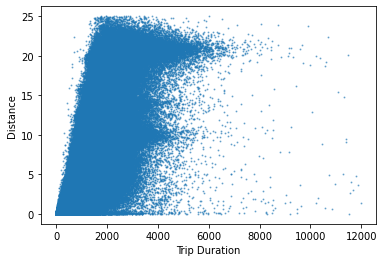

In [64]:
plt.scatter(df.trip_duration, df.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

**Let's focus on the graph area where distance is < 50 km and duration is < 1000 seconds.**

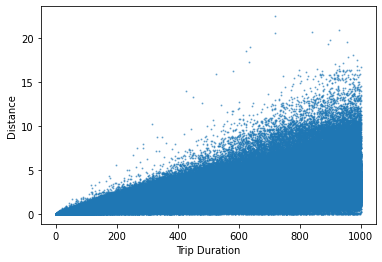

In [69]:
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

We should remove those trips which covered 0 km distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

In [70]:
df = df[~((df.distance == 0) & (df.trip_duration >= 60))]

Now, Instead of looking at each and every trip, we should approximate and try to filter those trips which covered less than 1 km distance and but clocked more than an hour.

In [71]:
df = df[~((df['distance'] <= 1) & (df['trip_duration'] >= 3600))]

In [116]:
df.drop(['dropoff_day','droptime', 'picktime',],inplace=True ,axis=1)


It is rarely occurs that customer keep sitting in the taxi for more than an hour and it does not travel for even 1 km.

**Creating dependent and independent variable**

In [117]:
dependent_variable = 'trip_duration'

In [118]:
 #Create a list of independent variables
independent_variables = list(set(df.columns.tolist())-{dependent_variable})

In [120]:
independent_variables

['distance',
 'pickuptime_Evening',
 'month_2',
 'passenger_count_3',
 'speed',
 'passenger_count_4',
 'pickup_hour',
 'month_6',
 'month_7',
 'month_3',
 'dropoff_latitude',
 'passenger_count',
 'passenger_count_5',
 'pickup_longitude',
 'day_Thursday',
 'passenger_count_2',
 'month_5',
 'pickuptime_Late night',
 'vendor_id',
 'dropoff_hour',
 'store_and_fwd_flag',
 'pickuptime_Morning',
 'dropoff_datetime',
 'passenger_count_6',
 'dropoff_longitude',
 'month_4',
 'day_Saturday',
 'flag_y',
 'day_Wednesday',
 'day_Sunday',
 'dropoff_day_no',
 'pickup_latitude',
 'vendor_id_2',
 'day_Monday',
 'dropoff_month',
 'day_Tuesday',
 'pickup_datetime',
 'id']

In [121]:
df.dtypes

id                               object
vendor_id                         int64
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag               object
trip_duration                     int64
distance                        float64
speed                           float64
dropoff_day_no                    int64
pickup_hour                       int64
dropoff_hour                      int64
dropoff_month                     int64
flag_y                            int64
month_2                           uint8
month_3                           uint8
month_4                           uint8
month_5                           uint8
month_6                           uint8
month_7                           uint8
day_Monday                        uint8


In [122]:
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

#Splitting the dataset into the Training set and Test set

**Applying Difffernt ML module**

In [123]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)

In [124]:
X1.shape


(1449006, 39)

In [125]:
import statsmodels.api as sm

In [134]:
df.dtypes

id                               object
vendor_id                         int64
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag               object
trip_duration                     int64
distance                        float64
speed                           float64
dropoff_day_no                    int64
pickup_hour                       int64
dropoff_hour                      int64
dropoff_month                     int64
flag_y                            int64
month_2                           uint8
month_3                           uint8
month_4                           uint8
month_5                           uint8
month_6                           uint8
month_7                           uint8
day_Monday                        uint8


In [ ]:
i

# Linear Regression

In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [89]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [132]:
X_train[0:10]

array([[1.110289322379696, 0, 0, 0, 19.309379519646885, 1, 7, 0,
        'Sunday', 0, 1, 40.75684356689453, 'Sunday', 4, 0,
        -73.98869323730467, 0, 0, 0, 0, 'Morning', 'Morning', 1, 7, 'N',
        1, Timestamp('2016-03-13 07:49:53'), 0, -74.00145721435547, 0, 0,
        0, 0, 1, 6, 40.75933837890625, 0, 0, 3, 0,
        Timestamp('2016-03-13 07:46:26'), 'id1949449'],
       [2.421663496442295, 1, 1, 0, 17.435977174384522, 0, 19, 0,
        'Friday', 0, 0, 40.78105926513672, 'Friday', 6, 0,
        -73.97136688232422, 0, 0, 0, 0, 'Evening', 'Evening', 2, 19, 'N',
        0, Timestamp('2016-02-19 19:51:00'), 1, -73.97985076904298, 0, 0,
        0, 0, 0, 4, 40.760250091552734, 1, 0, 2, 0,
        Timestamp('2016-02-19 19:42:40'), 'id0218541'],
       [0.007120267110685286, 0, 0, 0, 0.2848106844274114, 0, 14, 0,
        'Friday', 0, 1, 40.74948501586913, 'Friday', 1, 0,
        -73.99447631835938, 0, 0, 0, 0, 'Afternoon', 'Afternoon', 1, 14,
        'N', 0, Timestamp('2016-03-25 14

In [133]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored